In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\hp\Downloads\employee_data.csv")

In [3]:
data.head(5)

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [4]:
data.drop('id',axis=1, inplace=True)

In [5]:
data.head(5)

,Unnamed: 0,groups,age,healthy_eating,active_lifestyle,salary
0,0,A,36,5,5,2297
1,1,A,55,3,5,1134
2,2,A,61,8,1,4969
3,3,O,29,3,6,902
4,4,O,34,6,2,3574


In [6]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
data.head(5)

,groups,age,healthy_eating,active_lifestyle,salary
0,A,36,5,5,2297
1,A,55,3,5,1134
2,A,61,8,1,4969
3,O,29,3,6,902
4,O,34,6,2,3574


In [8]:
data['groups'].unique()

array(['A', 'O', 'AB', 'B'], dtype=object)

In [9]:
data['groups'].replace(['A','AB','O','B'],[1,2,3,4],inplace=True)

In [10]:
data.head(5)

,groups,age,healthy_eating,active_lifestyle,salary
0,1,36,5,5,2297
1,1,55,3,5,1134
2,1,61,8,1,4969
3,3,29,3,6,902
4,3,34,6,2,3574


In [11]:
data.isnull().sum()

groups              0
age                 0
healthy_eating      0
active_lifestyle    0
salary              0
dtype: int64

In [12]:
data.head()

,groups,age,healthy_eating,active_lifestyle,salary
0,1,36,5,5,2297
1,1,55,3,5,1134
2,1,61,8,1,4969
3,3,29,3,6,902
4,3,34,6,2,3574


In [13]:
X = data.drop('salary', axis=1)

In [14]:
X.head()

,groups,age,healthy_eating,active_lifestyle
0,1,36,5,5
1,1,55,3,5
2,1,61,8,1
3,3,29,3,6
4,3,34,6,2


In [15]:
y = data['salary']

In [16]:
y.head()

0    2297
1    1134
2    4969
3     902
4    3574
Name: salary, dtype: int64

**splitting the data into the training and testing data**

In [17]:
from sklearn.model_selection import train_test_split # module for splitting the data

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [19]:
X_test

,groups,age,healthy_eating,active_lifestyle
521,1,42,7,4
737,1,22,8,4
740,3,20,8,5
660,3,51,7,7
411,3,44,6,8
...,...,...,...,...
408,1,25,2,5
332,3,60,6,4
208,1,23,9,3
613,3,42,3,5


In [20]:
X_train

,groups,age,healthy_eating,active_lifestyle
29,3,20,8,6
535,4,24,7,4
695,4,45,6,6
557,3,30,5,5
836,3,41,4,1
...,...,...,...,...
106,1,56,6,5
270,2,51,10,4
860,3,30,5,2
435,3,41,7,5


**scaling of data so that it can derive insight from it**

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # here the data is already fitted in scale from first step hence simply sc.transform

In [24]:
X_train

array([[ 0.68657966, -1.54071339,  1.5203237 ,  0.1569256 ],
       [ 1.59897788, -1.2421436 ,  1.02510425, -0.8162564 ],
       [ 1.59897788,  0.32534776,  0.52988481,  0.1569256 ],
       ...,
       [ 0.68657966, -0.79428893,  0.03466536, -1.7894384 ],
       [ 0.68657966,  0.02677798,  1.02510425, -0.3296654 ],
       [-0.22581856, -0.27179181, -0.46055408,  0.1569256 ]])

In [25]:
X_test

array([[-1.13821678,  0.10142042,  1.02510425, -0.8162564 ],
       [-1.13821678, -1.39142849,  1.5203237 , -0.8162564 ],
       [ 0.68657966, -1.54071339,  1.5203237 , -0.3296654 ],
       [ 0.68657966,  0.77320244,  1.02510425,  0.6435166 ],
       [ 0.68657966,  0.25070531,  0.52988481,  1.1301076 ],
       [-0.22581856,  0.77320244,  0.03466536,  1.1301076 ],
       [-1.13821678,  1.370342  , -0.95577353, -1.3028474 ],
       [-1.13821678, -0.27179181, -2.44143187, -0.8162564 ],
       [ 0.68657966,  0.02677798, -0.95577353,  1.1301076 ],
       [-1.13821678,  0.17606287,  0.03466536, -0.8162564 ],
       [ 0.68657966, -1.01821626, -0.46055408,  1.1301076 ],
       [ 0.68657966,  1.370342  , -0.46055408, -0.3296654 ],
       [ 0.68657966,  0.02677798,  1.02510425,  0.1569256 ],
       [ 0.68657966,  0.47463265, -0.95577353,  0.1569256 ],
       [-1.13821678, -1.09285871, -1.45099298, -0.8162564 ],
       [ 0.68657966,  0.10142042,  1.02510425,  1.6166986 ],
       [-1.13821678,  0.

# LINEAR REGRESSION

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

r = RandomForestRegressor()
r.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [28]:
y1 = lr.predict(X_test)
y2 = svm.predict(X_test)
y3 = r.predict(X_test)
y4 = gr.predict(X_test)

**calculating the efficiency**

In [29]:
from sklearn import metrics

In [30]:
s1= metrics.r2_score(y_test,y1)
s2= metrics.r2_score(y_test,y2)
s3= metrics.r2_score(y_test,y3)
s4= metrics.r2_score(y_test,y4)

In [31]:
print(s1,s2,s3,s4)

0.9070334870572202 0.07574969276348342 0.9945460334452404 0.9967626945109364


**now arranging the efficienies in the dataframe**

In [32]:
final = {'Models':['LR','SVM','RFR','GBR'], 'SCORES':[s1,s2,s3,s4]}

In [33]:
data1 = pd.DataFrame(final)

In [34]:
data1

,Models,SCORES
0,LR,0.907033
1,SVM,0.075750
2,RFR,0.994546
3,GBR,0.996763


**visualising the efficiencies**

In [35]:
import seaborn as sns

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='SCORES'>

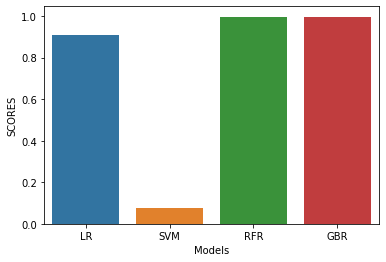

In [36]:
sns.barplot(data1['Models'],data1['SCORES'])

**training the full data in the GBR**

In [37]:
y

0      2297
1      1134
2      4969
3       902
4      3574
       ... 
995    2996
996     667
997    4158
998    2414
999     788
Name: salary, Length: 1000, dtype: int64

In [38]:
y = np.array(y)

In [39]:
X = sc.fit_transform(X)

**calculating the efficiency**

In [40]:
gr = GradientBoostingRegressor()
gr.fit(X, y)

GradientBoostingRegressor()

In [41]:
import joblib

In [42]:
joblib.dump(gr,'Employement_predict')

['Employement_predict']

In [43]:
model  = joblib.load('Employement_predict')

# GUI

In [44]:
from tkinter import*
import joblib
from sklearn.preprocessing import StandardScaler

In [ ]:
def prediction():
    v1 = float(t1.get())
    v2 = float(t2.get())
    v3 = float(t3.get())
    v4 = float(t4.get())
    model = joblib.load('Employement_predict')
    result = model.predict(sc.transform([[v1,v2,v3,v4]]))
    label = Label(root,text=str(result)).grid(row=31)
root = Tk()
root.title("SALARY PREDICTION")
label = Label(root,text="SALARY PREDICTION",fg="red").grid(row=0,columnspan=2)
t1 = Entry(root,width=350)
t1.grid(row=0,column=1)
t2 = Entry(root,width=350)
t2.grid(row=1,column=1)
t3 = Entry(root,width=350)
t3.grid(row=2,column=1)
t4 = Entry(root,width=350)
t4.grid(row=3,column=1)

Label(root, text="Enter Your Blood group Press 1 for A, 2 for AB, 3 for O and 4 for B ").grid(row=0,column=0)
Label(root, text = "Enter your Age").grid(row=1,column=0)
Label(root, text = "Enter your eating rating").grid(row=2,column=0)
Label(root, text = "Enter lifestyle rating").grid(row=3,column=0)

Button(root,text="Predict",command=prediction).grid(row=8,column=0)
mainloop()